In [1]:
#importing modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#importing dataset
iris_dataset=pd.read_csv('iris.csv')

In [7]:
#printing first 5 rows
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#data-preprocessing
#display stats about data
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
#display number of samples in each species
iris_dataset['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: >

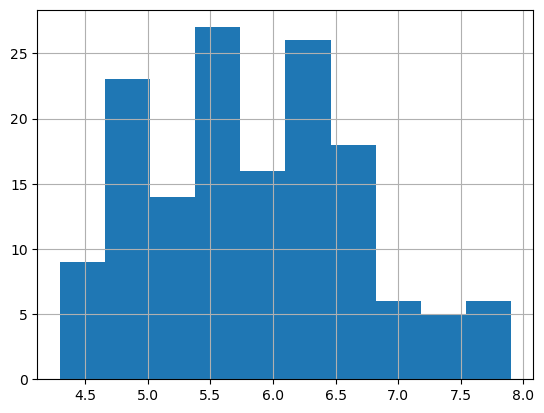

In [26]:
#data visualization
#1.histogram
iris_dataset['sepal_length'].hist()

<Axes: >

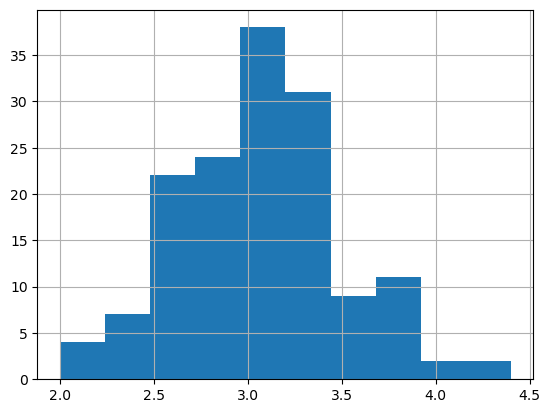

In [16]:
iris_dataset['sepal_width'].hist()

<Axes: >

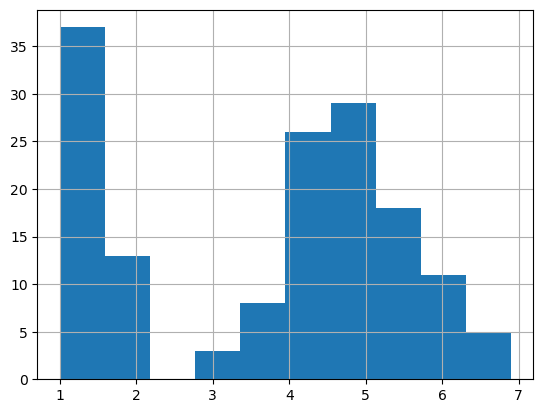

In [17]:
iris_dataset['petal_length'].hist()

<Axes: >

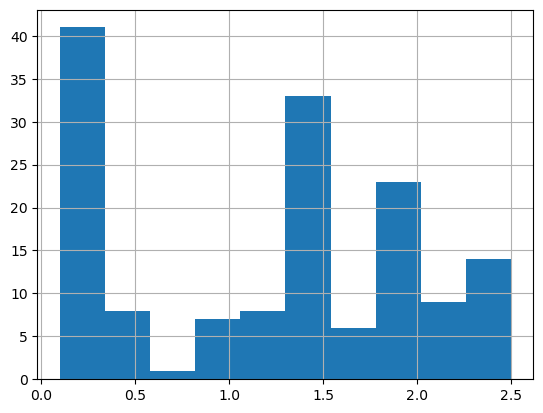

In [18]:
iris_dataset['petal_width'].hist()

In [19]:
#2.scattered plots
colors=['red','orange','yellow']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
    

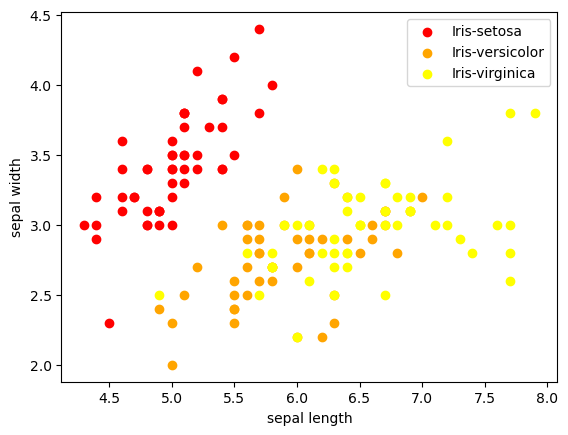

In [22]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()

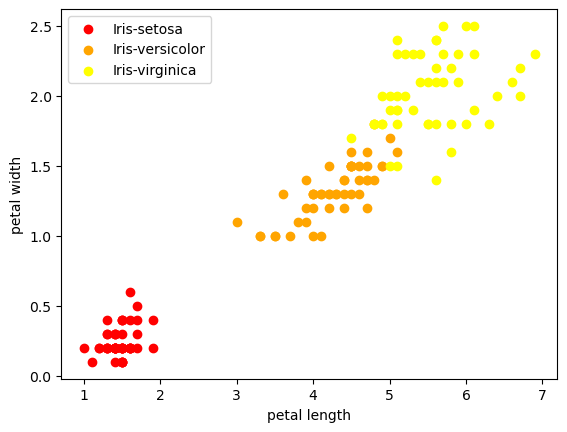

In [23]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()

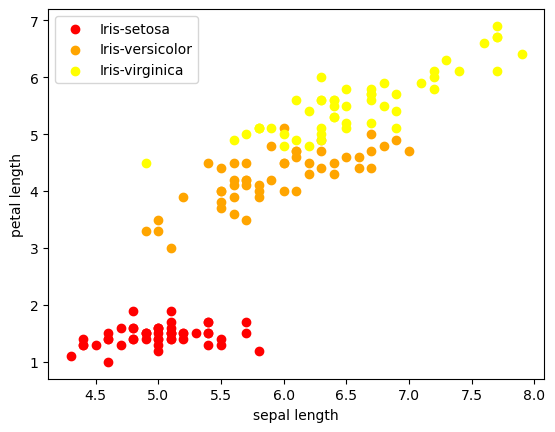

In [24]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('petal length')
    plt.legend()

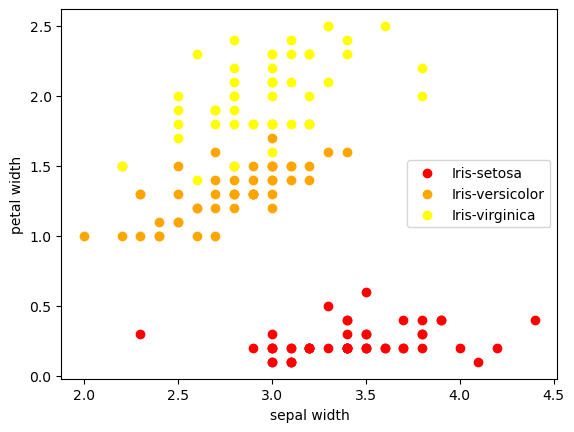

In [25]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal width')
    plt.ylabel('petal width')
    plt.legend()

In [30]:
#correlation matrix
numeric_columns = iris_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

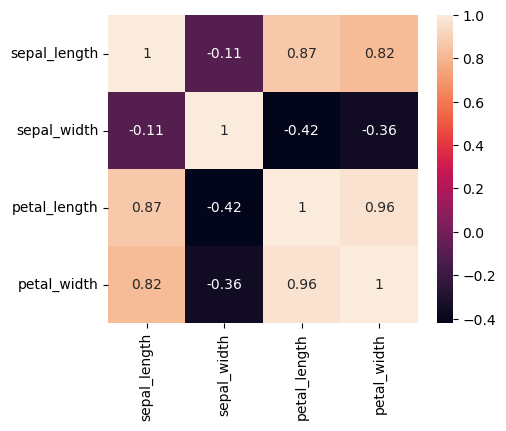

In [33]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax)

In [40]:
iris_dataset.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

In [41]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
iris_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [45]:
x=iris_dataset.drop(columns=['species'],axis=1)
y=iris_dataset['species']

In [48]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
print(x.shape,x_train.shape,x_test.shape)

(150, 4) (120, 4) (30, 4)


In [51]:
#model training
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [52]:
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
#model evaluation
x_train_prediction=model.predict(x_train)

In [54]:
print(x_train_prediction)

[2 0 1 2 1 0 2 1 1 2 1 1 2 1 0 2 0 1 0 0 0 1 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1
 0 1 0 2 1 1 0 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0
 2 0 0 1 2 1 2 1 1 2 1 1 1 2 2 2 2 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0
 2 1 0 2 1 0 0 1 0]


In [56]:
#accuracy score on traing data
from sklearn.metrics import accuracy_score
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("accuracy score of training data: ",training_data_accuracy)

accuracy score of training data:  0.975


In [57]:
#accuracy score on test data
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


In [58]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("accuracy score of test data: ",test_data_accuracy)

accuracy score of test data:  0.9666666666666667


In [61]:
#making predictive system
input_data=(7,3.2,4.7,1.4)
#changing input to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshaping numpy array as we prdicting for one instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

[1]


/Users/Nivya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
